### ASSIGNMENT PYTHON 1 - DEBRIAN RUHUT SARAGIH
### DATASET CONTAINS
lsoa_code, borough, major_category, minor_category, value, year, month

### QUESTIONS
1. Bagaimana statistik kejadian kriminal dari tahun 2008 ke 2016?
2. Top 3 kejadian kriminal selama 3 tahun terakhir?
3. Perbandingan kejadian kriminal di masing-masing wilayah

### CODE REVIEW
Area Plot, Histogram, Bar Chart, Pie Chart, Box Plot, Scatter Plot, Word Clouds, Folium Maps, Prepocessing

## Importing Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
df_crime = pd.read_csv('london_crime_by_lsoa.csv')
df_crime.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


## Checking Dataset

In [3]:
# isnull()
df_crime.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [4]:
# checking shape
df_crime.shape

(13490604, 7)

In [5]:
# checking columns info
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


## Describing Dataset

In [6]:
# Get value counts per year
df_crime['year'].value_counts()

2008    1498956
2009    1498956
2010    1498956
2011    1498956
2012    1498956
2013    1498956
2014    1498956
2015    1498956
2016    1498956
Name: year, dtype: int64

In [7]:
# Get value counts per year
df_crime['borough'].value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

## Question 1
Bagaimana statistik kejadian kriminal dari tahun 2008 ke 2016?

In [8]:
df_1 = df_crime.groupby('year', as_index=True).agg({"value":"sum"})
df_1

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


Text(0.5, 0, 'Tahun')

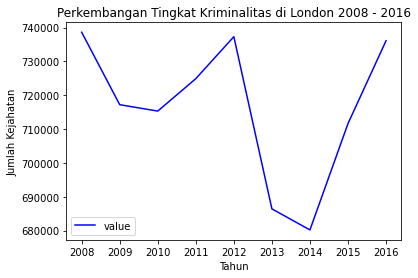

In [9]:
df_1.index = df_1.index.map(int)
df_1.plot(kind='line', c='b')

plt.title('Perkembangan Tingkat Kriminalitas di London 2008 - 2016')
plt.ylabel('Jumlah Kejahatan')
plt.xlabel('Tahun')

## Question 2
Top 3 kejadian kriminal selama 3 tahun terakhir?

<AxesSubplot:xlabel='year'>

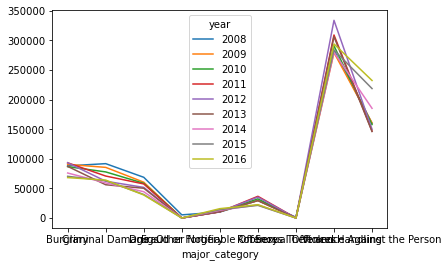

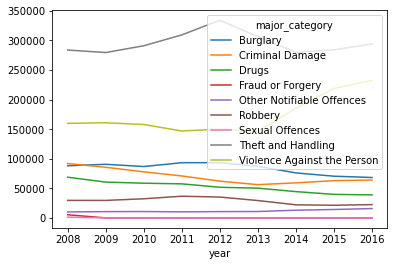

In [10]:
df_2 = pd.pivot_table(df_crime, values='value', index=['major_category'],columns=['year'], aggfunc=np.sum)
df_2
df_2.plot(kind='line')

df_top3 = df_2.transpose()
df_top3.plot(kind='line')

In [11]:
df_2['Total'] = df_2.sum(axis=1) #add total
df_2

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
major_category,,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081


In [12]:
df_crime[df_crime['year'] == 2008].groupby('borough')['value'].sum()

borough
Barking and Dagenham      17656
Barnet                    23944
Bexley                    15305
Brent                     23504
Bromley                   24015
Camden                    32010
City of London                0
Croydon                   29516
Ealing                    28947
Enfield                   21980
Greenwich                 22010
Hackney                   22004
Hammersmith and Fulham    21114
Haringey                  25724
Harrow                    13774
Havering                  15395
Hillingdon                24318
Hounslow                  20204
Islington                 26273
Kensington and Chelsea    20663
Kingston upon Thames      10661
Lambeth                   31717
Lewisham                  27054
Merton                    13875
Newham                    29752
Redbridge                 20873
Richmond upon Thames      11106
Southwark                 33470
Sutton                    12943
Tower Hamlets             23578
Waltham Forest            24080


<AxesSubplot:xlabel='borough'>

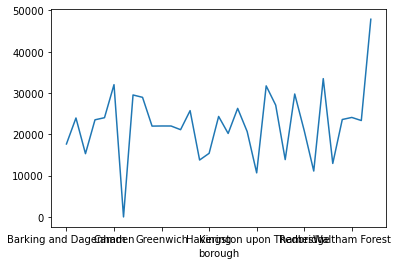

In [13]:
df_crime[df_crime['year'] == 2008].groupby('borough')['value'].sum().plot()